In [1]:
# Chpater 2 Main

In [2]:
import pandas as pd

housing = pd.read_csv("datasets/housing/housing.csv")

In [3]:
# # Testing
# from sklearn.preprocessing import OneHotEncoder

# housing = pd.get_dummies(data=housing, columns=["ocean_proximity"])

In [4]:
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()

# housing["ocean_proximity"] = le.fit_transform(housing["ocean_proximity"])




In [5]:
# import category_encoders as ce

# categoey = ce.BinaryEncoder()

# housing_code = categoey.fit_transform(housing["ocean_proximity"])

In [6]:
# housing_code.head(10)

In [7]:
# housing.drop("ocean_proximity", axis=1, inplace=True)

In [8]:
# housing = pd.concat([housing, housing_code], axis=1)

In [9]:
# housing.head(10)

In [10]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [11]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [12]:
housing["ocean_proximity"].value_counts(normalize=True)

ocean_proximity
<1H OCEAN     0.442636
INLAND        0.317393
NEAR OCEAN    0.128779
NEAR BAY      0.110950
ISLAND        0.000242
Name: proportion, dtype: float64

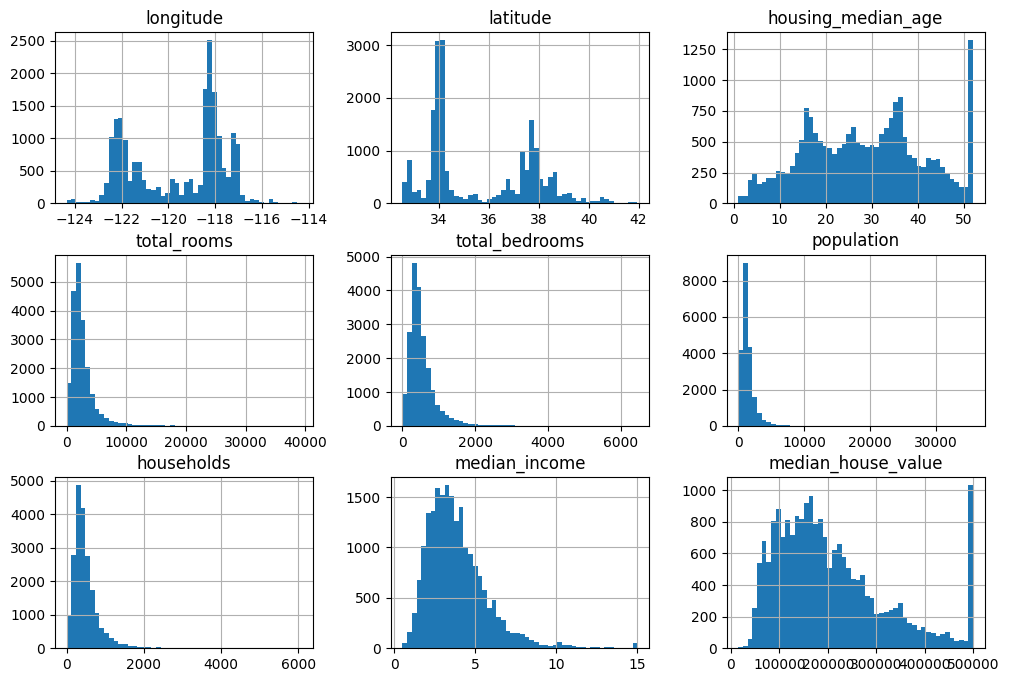

In [13]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(12,8))

plt.show()


In [14]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [15]:
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [16]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42, shuffle=True, stratify=housing["ocean_proximity"])

In [17]:
print(train_set["ocean_proximity"].value_counts())

ocean_proximity
<1H OCEAN     7309
INLAND        5241
NEAR OCEAN    2126
NEAR BAY      1832
ISLAND           4
Name: count, dtype: int64


Axes(0.125,0.11;0.775x0.77)


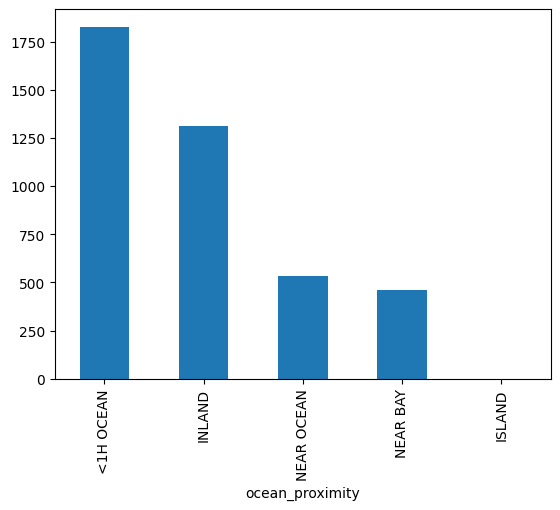

In [18]:
print(test_set["ocean_proximity"].value_counts().plot.bar())

In [19]:
# Day 2
import numpy as np
print("--")

housing["income_cat"] = pd.cut(housing["median_income"], bins=[0,1.5,3.0,4.5,6, np.inf], labels=[1,2,3,4,5])

--


In [20]:
housing["income_cat"].value_counts(normalize=True)

income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: proportion, dtype: float64

In [21]:
strat_train_set, strat_test_set = train_test_split(housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

In [22]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [23]:
housing = strat_train_set.copy()

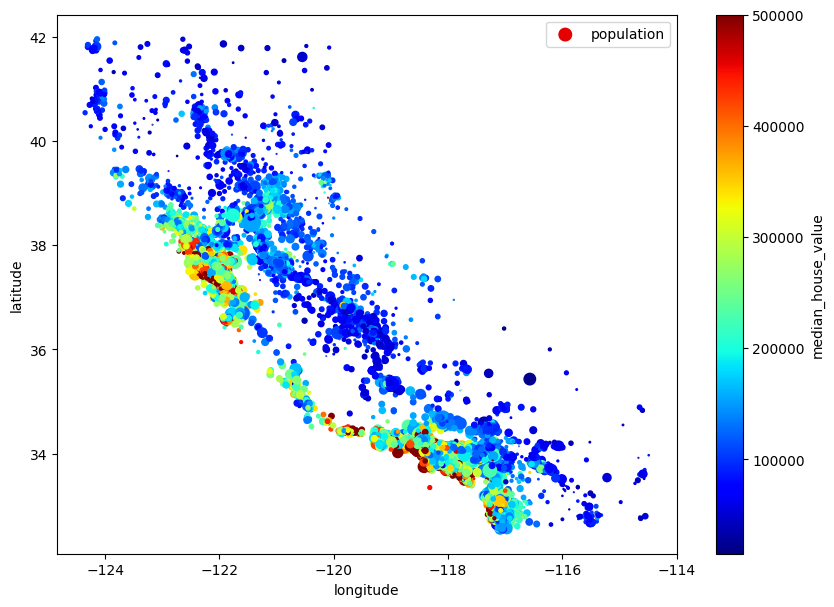

In [24]:
import seaborn as sns

housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, s=housing["population"] / 100, label="population", c="median_house_value", cmap="jet", colorbar=True, legend=True, sharex=False ,figsize=(10,7))
plt.grid()
plt.show()

In [25]:
# corr_matrix = housing.corr()

housing_numeric = housing.select_dtypes(exclude=["object"])

In [26]:
corr_matrix = housing_numeric.corr()

In [27]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

<Axes: >

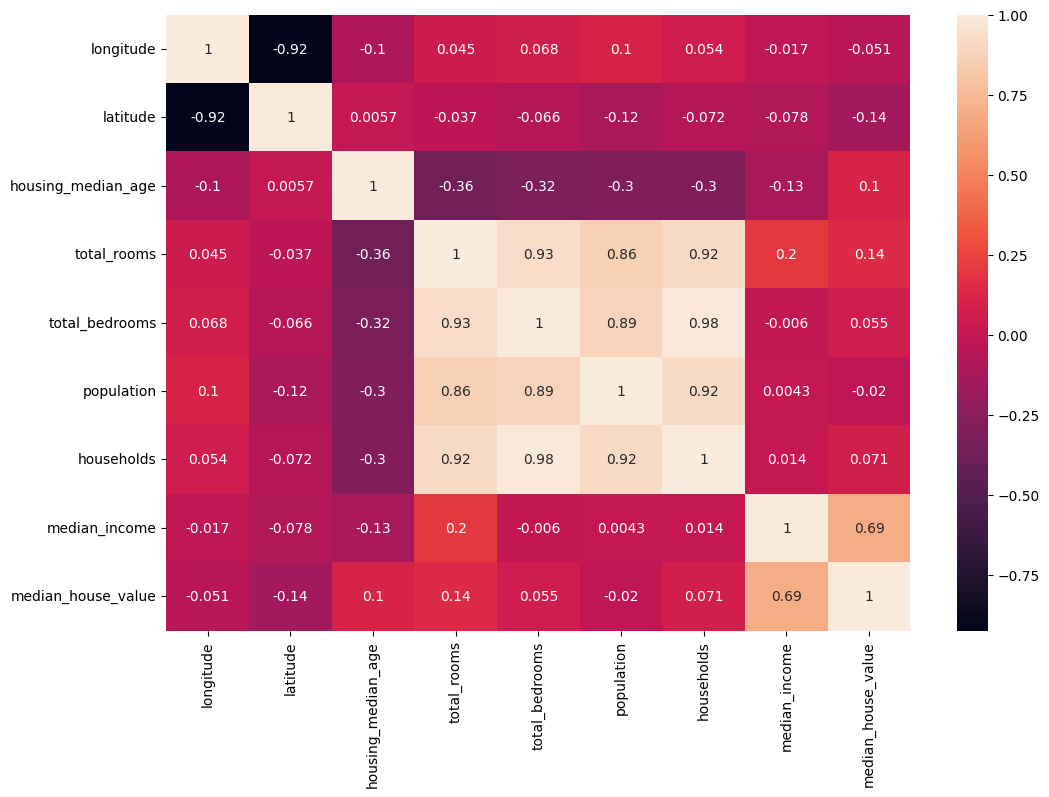

In [28]:
plt.figure(figsize=(12,8))

sns.heatmap(corr_matrix, annot=True)

In [29]:
housing = strat_train_set.drop("median_house_value", axis=1)

housing_labels = strat_train_set["median_house_value"].copy()

In [30]:
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        168
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [31]:
median = housing["total_bedrooms"].median()

housing["total_bedrooms"].fillna(median, inplace=True)

In [32]:
housing.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
dtype: int64

In [33]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [34]:
housing_num = housing.select_dtypes(include=[np.number])

imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [35]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [36]:
housing_num.median()

longitude             -118.5100
latitude                34.2600
housing_median_age      29.0000
total_rooms           2125.0000
total_bedrooms         434.0000
population            1167.0000
households             408.0000
median_income            3.5385
dtype: float64

In [37]:
X = imputer.transform(housing_num)

In [38]:
housing_cat = housing[["ocean_proximity"]]

housing_cat.head(8)

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
1286,INLAND
18078,<1H OCEAN
4396,NEAR BAY


In [39]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [40]:
housing_cat_encoded[:10]

array([[3.],
       [0.],
       [1.],
       [1.],
       [4.],
       [1.],
       [0.],
       [3.],
       [0.],
       [0.]])

In [41]:
housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,NEAR BAY
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,<1H OCEAN
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,INLAND
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,INLAND
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,NEAR OCEAN
1286,-121.31,37.96,52.0,1829.0,301.0,694.0,319.0,3.3466,INLAND
18078,-118.36,33.85,34.0,1086.0,197.0,509.0,158.0,6.1133,<1H OCEAN
4396,-122.13,37.41,36.0,4787.0,900.0,2039.0,890.0,5.4063,NEAR BAY
18031,-118.44,34.31,22.0,3182.0,822.0,2661.0,746.0,2.7472,<1H OCEAN
6753,-118.13,34.06,17.0,1714.0,572.0,1590.0,568.0,1.1875,<1H OCEAN


In [42]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [43]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

ohe = OneHotEncoder()
lb = LabelEncoder()



In [44]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [45]:
min_max_scaler = MinMaxScaler(feature_range=(-1,1))

In [46]:
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)

In [47]:
housing_num_min_max_scaled_df = pd.DataFrame(housing_num_min_max_scaled, columns=housing_num.columns)

In [48]:
housing_num_min_max_scaled_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-0.608519,0.117021,1.000000,-0.831171,-0.641166,-0.807018,-0.614336,-0.779479
1,0.210953,-0.661702,0.529412,-0.900148,-0.886294,-0.918660,-0.867090,-0.229293
2,-0.519270,0.236170,0.254902,-0.945012,-0.930424,-0.931419,-0.924585,-0.733369
3,0.468560,-0.744681,-0.372549,-0.787782,-0.726204,-0.774015,-0.709166,-0.756983
4,0.257606,-0.740426,0.372549,-0.778015,-0.610243,-0.765796,-0.562815,-0.582171


In [49]:
std_scaler = StandardScaler()

housing_num_std_scaled = std_scaler.fit_transform(housing_num)

In [50]:
housing_num_std_scaled_df = pd.DataFrame(housing_num_std_scaled, columns=housing_num.columns)

housing_num_std_scaled_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491
1,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942
2,-1.203098,1.276119,0.351428,-0.712240,-0.760709,-0.788768,-0.775727,-0.759789
3,1.231216,-0.884924,-0.919891,0.702262,0.742306,0.383175,0.731375,-0.850281
4,0.711362,-0.875549,0.589800,0.790125,1.595753,0.444376,1.755263,-0.180365


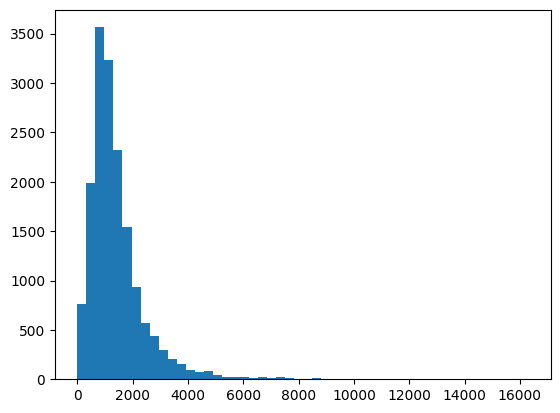

In [51]:
plt.hist(strat_train_set["population"], bins=50)
plt.show()

In [52]:
# strat_train_set["population"] = np.log(strat_train_set["population"])

In [53]:
# plt.hist(strat_train_set["population"], bins=50)
# plt.show()

In [54]:
from sklearn.linear_model import LinearRegression

target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(housing_labels.to_frame())

In [55]:
model = LinearRegression()

model.fit(housing[["median_income"]], scaled_labels)

LinearRegression()

In [56]:
some_new_data = housing[["median_income"]].iloc[:5]

In [57]:
scaled_prediction = model.predict(some_new_data)
print(scaled_prediction)

[[-0.64466228]
 [ 0.80674175]
 [-0.52302364]
 [-0.5853166 ]
 [-0.12415952]]


In [58]:
prediction = target_scaler.inverse_transform(scaled_prediction)

In [59]:
print(prediction)

[[131997.15275877]
 [299359.35844434]
 [146023.37185694]
 [138840.33653057]
 [192016.61557639]]


In [60]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler())
])



In [61]:
num_pipeline

Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('standardize', StandardScaler())])

In [62]:
housing_num_prepared = num_pipeline.fit_transform(housing_num)
housing_num_prepared

array([[-1.42303652,  1.0136059 ,  1.86111875, ...,  0.13746004,
         1.39481249, -0.93649149],
       [ 0.59639445, -0.702103  ,  0.90762971, ..., -0.69377062,
        -0.37348471,  1.17194198],
       [-1.2030985 ,  1.27611874,  0.35142777, ..., -0.78876841,
        -0.77572662, -0.75978881],
       ...,
       [ 1.25620853, -1.42870103, -1.23772062, ...,  1.26829911,
         0.67913534,  0.1010487 ],
       [ 0.58639727, -0.73960483,  0.66925745, ...,  0.27356264,
         0.88286825,  0.14539615],
       [-1.41803793,  0.94797769,  1.22545939, ..., -0.67915557,
        -0.75221898, -0.31034135]])

In [63]:
df_housing_num_prepared = pd.DataFrame(housing_num_prepared, columns=num_pipeline.get_feature_names_out(), index=housing_num.index)

df_housing_num_prepared.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491
14973,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942
3785,-1.203098,1.276119,0.351428,-0.712240,-0.760709,-0.788768,-0.775727,-0.759789
14689,1.231216,-0.884924,-0.919891,0.702262,0.742306,0.383175,0.731375,-0.850281
20507,0.711362,-0.875549,0.589800,0.790125,1.595753,0.444376,1.755263,-0.180365


In [64]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

num_atribute = ["longtitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income"]
cat_atribute = ["ocean_proximity"]

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore")
)

In [65]:
preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_atribute),
    ("cat", cat_pipeline, cat_atribute)
])

In [66]:
from sklearn.compose import make_column_selector, make_column_transformer

In [67]:
preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)

In [68]:
housing_prepared = preprocessing.fit_transform(housing)

In [69]:
housing_prepared

array([[-1.42303652,  1.0136059 ,  1.86111875, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.59639445, -0.702103  ,  0.90762971, ...,  0.        ,
         0.        ,  0.        ],
       [-1.2030985 ,  1.27611874,  0.35142777, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.25620853, -1.42870103, -1.23772062, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.58639727, -0.73960483,  0.66925745, ...,  0.        ,
         0.        ,  0.        ],
       [-1.41803793,  0.94797769,  1.22545939, ...,  0.        ,
         0.        ,  1.        ]])

In [70]:
preprocessing

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardize',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000022883484FE0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x00000228A7935A60>)])

In [71]:
# Custom Transformer

In [72]:
from sklearn.preprocessing import FunctionTransformer

In [78]:
log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_population = log_transformer.transform(housing[["population"]])

In [79]:
log_population

,population
13096,7.362645
14973,6.501290
3785,6.331502
14689,7.520235
20507,7.555905
...,...
14207,6.843750
13105,7.257708
19301,7.942362
19121,7.452982


In [83]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 13096 to 19888
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [84]:
cat_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"), OneHotEncoder(handle_unknown="ignore"))

log_pipeline = make_pipeline(SimpleImputer(strategy="median"), FunctionTransformer(np.log, feature_names_out="one-to-one"), StandardScaler())

default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>, <Axes: >]],
      dtype=object)

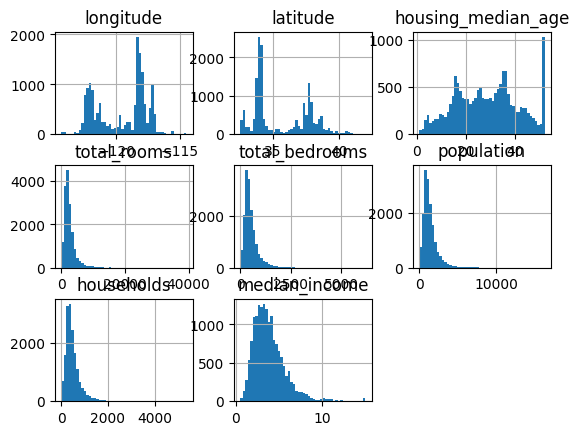

In [85]:
housing.hist(bins=50)

In [99]:
housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
dtype: int64

In [133]:
preprocessing = ColumnTransformer(
    [
        ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population", "households", "median_income"]),
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
    ],
    remainder=default_num_pipeline
)

In [134]:
print(housing["latitude"].isnull().sum())


0


In [135]:
housing_prepared = preprocessing.fit_transform(housing)

In [136]:
housing_prepared.shape

(16512, 13)

In [137]:
preprocessing.get_feature_names_out()

array(['log__total_bedrooms', 'log__total_rooms', 'log__population',
       'log__households', 'log__median_income',
       'cat__ocean_proximity_<1H OCEAN', 'cat__ocean_proximity_INLAND',
       'cat__ocean_proximity_ISLAND', 'cat__ocean_proximity_NEAR BAY',
       'cat__ocean_proximity_NEAR OCEAN', 'remainder__longitude',
       'remainder__latitude', 'remainder__housing_median_age'],
      dtype=object)

In [138]:
housing_prepared

array([[ 1.32411352,  0.6378921 ,  0.45690625, ..., -1.42303652,
         1.0136059 ,  1.86111875],
       [-0.25267077, -0.06357551, -0.71165416, ...,  0.59639445,
        -0.702103  ,  0.90762971],
       [-0.92526639, -0.85992721, -0.94199727, ..., -1.2030985 ,
         1.27611874,  0.35142777],
       ...,
       [ 0.82420624,  0.85955215,  1.24338084, ...,  1.25620853,
        -1.42870103, -1.23772062],
       [ 0.98785097,  0.81129291,  0.57946226, ...,  0.58639727,
        -0.73960483,  0.66925745],
       [-1.07217904, -2.09154331, -0.67944724, ..., -1.41803793,
         0.94797769,  1.22545939]])

In [139]:
has_nan = np.isnan(housing_prepared).sum()
print(has_nan)

0


In [140]:
for i in housing_prepared:
    print(i)

[ 1.32411352  0.6378921   0.45690625  1.31036907 -1.07152161  0.
  0.          0.          1.          0.         -1.42303652  1.0136059
  1.86111875]
[-0.25267077 -0.06357551 -0.71165416 -0.14203029  1.1947116   1.
  0.          0.          0.          0.          0.59639445 -0.702103
  0.90762971]
[-0.92526639 -0.85992721 -0.94199727 -0.91302981 -0.75698149  0.
  1.          0.          0.          0.         -1.2030985   1.27611874
  0.35142777]
[ 0.9527734   0.9434747   0.67070018  0.92537295 -0.91225252  0.
  1.          0.          0.          0.          1.23121557 -0.88492444
 -0.91989094]
[ 1.43762212  1.0035896   0.71909271  1.48146444  0.03453732  0.
  0.          0.          0.          1.          0.71136206 -0.87554898
  0.58980003]
[-0.47556846 -0.15944783 -0.65578409 -0.29573678 -0.07851795  0.
  1.          0.          0.          0.         -0.86819286  1.08860957
  1.86111875]
[-1.05815517 -0.85622955 -1.07637892 -1.25529857  1.20367666  1.
  0.          0.          

In [142]:
preprocessing.get_feature_names_out()

array(['log__total_bedrooms', 'log__total_rooms', 'log__population',
       'log__households', 'log__median_income',
       'cat__ocean_proximity_<1H OCEAN', 'cat__ocean_proximity_INLAND',
       'cat__ocean_proximity_ISLAND', 'cat__ocean_proximity_NEAR BAY',
       'cat__ocean_proximity_NEAR OCEAN', 'remainder__longitude',
       'remainder__latitude', 'remainder__housing_median_age'],
      dtype=object)

In [143]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('log',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)...
                                                                   StandardScaler())]),
                                                  ['total_bedrooms',
                                                   'total_rooms', 'population',
                                                   'households',
                                                   'median_income']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000022883512CF0>)])),
                ('linearregression', LinearRegression())])

In [144]:
housing_prediction = lin_reg.predict(housing)

In [150]:
housing_prediction[:5].round(2)

array([251401.25, 355840.99, 127167.09, 107639.92, 295920.73])

In [154]:
housing_labels[:5].values

array([458300., 483800., 101700.,  96100., 361800.])

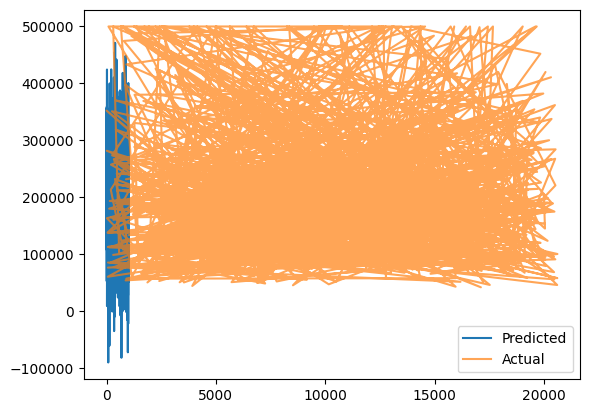

In [157]:
plt.plot(housing_prediction[:1000], label="Predicted")
plt.plot(housing_labels[:1000], label="Actual", alpha=0.7)
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error

lin_rmse = mean_squared_error(housing_labels, housing_prediction, squared=False)

print(lin_rmse)

71384.69747107038


C:\Users\Asus TUF\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [162]:
test = pd.read_csv("datasets/housing/housing.csv")

test.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [163]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)

tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

In [166]:
housing_predict_tree = tree_reg.predict(housing_prepared)

tree_rmse = mean_squared_error(housing_predict_tree, housing_labels)
print(tree_rmse)

0.0


In [170]:
from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_root_mean_squared_error", cv=10)

In [171]:
pd.Series(tree_rmses).describe()

count       10.000000
mean     68492.896686
std       1376.483363
min      66668.557436
25%      67416.702822
50%      68384.491328
75%      69599.111968
max      70766.972251
dtype: float64

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Add Random Forest